In [2]:
%matplotlib notebook
import random as rn
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])


def RollDice():
    roll = rn.randint(1,100)
    if roll == 100:
        #print(roll, ":100, You lose")
        return False
    elif roll <= 60:
        #print(roll,": 1-50, You lose")
        return False
    else:
        #print(roll,": 51-99, You win")
        return True
    
def SimpleBettor(funds,intial_wager,wager_count):
    value = funds
    wager = intial_wager
    
    wX = []
    vY = []
    
    current_wager=1
    
    while current_wager <= wager_count:
        if RollDice():
            value += wager
            wX.append(current_wager)
            vY.append(value)
        else:
            value -= wager
            wX.append(current_wager)
            vY.append(value)
        current_wager += 1
    if value <0:
        value ="broke"
    #print("Funds:",value)
    plt.plot(wX,vY)
    return value

def doubler(funds,intial_wager,wager_count):
    value = funds
    wager = intial_wager
    
    wX = []
    vY = []
    
    current_wager =1
    previousWager = "win"
    previousWagerAmount = intial_wager
    
    brokeafter = []
    
    while current_wager <= wager_count:
        if previousWager=="win":
            if RollDice():
                value+=wager
                wX.append(current_wager)
                vY.append(value)
            else:
                value -= wager
                previousWager = "loss"
                previousWagerAmount = wager
                wX.append(current_wager)
                vY.append(value)
                if value < 0:
                    brokeafter = current_wager
                    break
        elif previousWager == "loss":
            if RollDice():
                wager = 2*previousWagerAmount
                value += wager
                wager=intial_wager
                previousWager="win"
                wX.append(current_wager)
                vY.append(value)
            else:
                wager = previousWagerAmount*2
                value -= wager                  
                previousWager="loss"
                previousWagerAmount=wager
                wX.append(current_wager)
                vY.append(value)
                if value < 0:
                    brokeafter=current_wager
                    break
                
        current_wager += 1
    plt.plot(wX,vY)
    return brokeafter
    
    

                

            

<IPython.core.display.Javascript object>


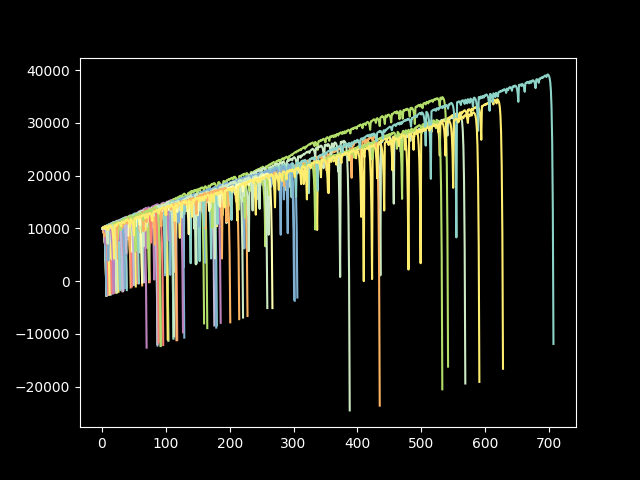

[7, 7, 7, 7, 7, 8, 9, 10, 10, 10, 10, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 15, 16, 17, 18, 20, 20, 23, 23, 23, 24, 25, 26, 27, 28, 29, 32, 32, 32, 33, 33, 34, 36, 39, 39, 45, 47, 50, 50, 53, 53, 56, 58, 63, 63, 66, 70, 74, 75, 87, 87, 89, 92, 92, 92, 96, 103, 104, 104, 112, 112, 113, 117, 117, 118, 127, 129, 160, 165, 176, 179, 180, 186, 201, 215, 221, 228, 259, 267, 301, 302, 306, 388, 435, 533, 542, 569, 591, 628, 707]
100


In [3]:
x = 0
d = []
while x<100:
    b=doubler(10000,100,1000)
    x+=1
    d.append(b)
d = sorted(list(filter(None,d)))
plt.show()
print(d)
print(len(d))

In [ ]:

x = 0
b = 0
c = 0
d = 0
while x<100:
    a = SimpleBettor(10000,100,10000)
    x+=1
    if a == "broke":
        d +=1
    elif a >=10000:
        b +=1
    else:
        c +=1
print(b,"Beat the sys")
print(c,"Fukd up")
print(b+c)
print(d,"Majorly fukd")
plt.suptitle('', color='w')
plt.xlabel("wager count")
plt.ylabel("Account value")
plt.show()
    